In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, roc_curve, auc, average_precision_score, RocCurveDisplay
import scipy.stats as stats
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif           
import shap


# Load the dataset
df = pd.read_csv('Dataset/diabetes.csv')

## Load dataset information

In [297]:
# Load dataset information
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [298]:
# Count Outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Data type & Null count

In [300]:
# Data type & Null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [301]:
# Check for null values in specific columns
print("Null values in Pregnancies column: {0}".format(df['Pregnancies'].isnull().sum()))
print("Null values in Glucose column: {0}".format(df['Glucose'].isnull().sum()))
print("Null values in BloodPressure column: {0}".format(df['BloodPressure'].isnull().sum()))
print("Null values in SkinThickness column: {0}".format(df['SkinThickness'].isnull().sum()))
print("Null values in Insulin column: {0}".format(df['Insulin'].isnull().sum()))
print("Null values in BMI column: {0}".format(df['BMI'].isnull().sum()))
print("Null values in DiabetesPedigreeFunction column: {0}".format(df['DiabetesPedigreeFunction'].isnull().sum()))
print("Null values in Age column: {0}".format(df['Age'].isnull().sum()))
print("Null values in Outcome column: {0}".format(df['Outcome'].isnull().sum()))

Null values in Pregnancies column: 0
Null values in Glucose column: 0
Null values in BloodPressure column: 0
Null values in SkinThickness column: 0
Null values in Insulin column: 0
Null values in BMI column: 0
Null values in DiabetesPedigreeFunction column: 0
Null values in Age column: 0
Null values in Outcome column: 0


# Check if there have missing value (0) or not

In [303]:
# Check if there have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 5
No. of rows with BloodPressure 0 is: 35
No. of rows with SkinThikness 0 is: 227
No. of rows with Insulin 0 is: 374
No. of rows with BMI 0 is: 11
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


# Fill missing value (0) by its mean

In [305]:
# Fill missing value (0) by its mean
Fill_Mean = SimpleImputer(strategy='mean', missing_values=0)
#Fill_Mean = Fill_Mean.fit(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
#df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Fill_Mean = Fill_Mean.fit(df[['Glucose','BloodPressure','BMI']])
#df[['Glucose','BloodPressure','SkinThickness','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','SkinThickness','BMI']])
df[['Glucose','BloodPressure','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','BMI']])

# Check if there still have missing value (0) or not

In [307]:
# Check if there still have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with SkinThikness 0 is: 227
No. of rows with Insulin 0 is: 374
No. of rows with BMI 0 is: 0
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


# Identify rows where 'SkinThickness' is 0

In [309]:
# Identify rows where 'SkinThickness' is 0
zero_SkinThickness_rows = df['SkinThickness'] == 0
non_zero_SkinThickness_rows = df['SkinThickness'] != 0

In [310]:
# Features for prediction
#features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#features = ['Glucose', 'SkinThickness', 'BMI','Age'] ## Based on Correlation Matrix before Apply Polynomial Regression
features = ['Glucose', 'BMI','Age'] ## Based on Correlation Matrix before Apply Polynomial Regression

# Apply Polynomial Regression to predict missing value (SkinThickness)

In [312]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
#poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df.loc[non_zero_SkinThickness_rows, features])
X_poly_zero = poly.transform(df.loc[zero_SkinThickness_rows, features])

In [313]:
# Target variable
y_SkinThickness = df.loc[non_zero_SkinThickness_rows, 'SkinThickness']

In [314]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_SkinThickness)

LinearRegression()

# Predict missing 'SkinThickness' values

In [316]:
# Predict missing 'SkinThickness' values
predicted_SkinThickness = model.predict(X_poly_zero)

# Fill the missing 'SkinThickness' values

In [318]:
# Fill the missing 'SkinThickness' values
df.loc[zero_SkinThickness_rows, 'SkinThickness'] = predicted_SkinThickness

C:\Users\user\AppData\Local\Temp\ipykernel_35688\2586123976.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[19.08148025 21.65671136 32.17420289 31.16416264 34.31707297 35.62505509
 26.99553377 26.89751659 26.42229609 32.57011656 38.04746425 37.01083498
 31.78552771 13.64471691 30.9924541  37.15301187 25.80520265 26.43644111
 28.61905013 37.78801298 28.13267003 31.03010492 20.63870142 30.76442153
 37.33395069 39.17651896 29.10286968 38.96728889 28.18347754 42.70745222
 10.87420804 23.77210133 36.34752022 20.44267359 15.52343926 35.52529996
 16.8791093  30.10422797 30.98984524 31.8243337  29.82259239 26.79429526
 29.42021746 26.53020999 30.69117247 28.06760718 20.20630206 30.25282997
 32.86295051 18.25776826 43.2227628  28.93077552 26.94759768 28.68943472
 28.16470329 28.52995967 40.39361641 36.2446216  18.76754108 22.32018798
 25.8277894  15.77580767 28.44284604 44.00642429 18.14811048 36.64424431
 3

# Check if there have missing value (0) or not

In [320]:
# Check if there have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with SkinThikness 0 is: 0
No. of rows with Insulin 0 is: 374
No. of rows with BMI 0 is: 0
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


## Identify rows where 'Insulin' is 0

In [322]:
# Identify rows where 'Insulin' is 0
zero_insulin_rows = df['Insulin'] == 0
non_zero_insulin_rows = df['Insulin'] != 0

In [323]:
# Features for prediction
#features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#features = ['Glucose', 'SkinThickness', 'BMI','Age'] ## Based on Correlation Matrix before Apply Polynomial Regression
features = ['Glucose', 'BMI','Age', 'SkinThickness'] ## Based on Correlation Matrix before Apply Polynomial Regression

## Apply Polynomial Regression to predict missing value (Insulin)

In [325]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
#poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df.loc[non_zero_insulin_rows, features])
X_poly_zero = poly.transform(df.loc[zero_insulin_rows, features])

In [326]:
# Target variable
y_Insulin = df.loc[non_zero_insulin_rows, 'Insulin']

In [327]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_Insulin)

LinearRegression()

## Predict missing 'Insulin' values

In [329]:
# Predict missing 'Insulin' values
predicted_insulin = model.predict(X_poly_zero)

## Fill the missing 'Insulin' values

In [331]:
# Fill the missing 'Insulin' values
df.loc[zero_insulin_rows, 'Insulin'] = predicted_insulin

C:\Users\user\AppData\Local\Temp\ipykernel_35688\357416716.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[208.9456629   55.53844106 221.85151174 112.9746324  139.72149868
 180.65652103 130.13167455 259.72149866 197.391926    98.01091113
 110.25691246 133.60115773 319.22382851 139.88828856 207.81122292
 140.10386444 215.82283508  44.69318481 140.76095051 180.65786783
 112.06050691  77.2605153  178.34399549 115.76166367 200.60537206
 323.40482152 191.26206218  34.959724   121.18137975 118.41918279
  38.17712532 206.69263436  76.57761635 169.44463114   7.09235776
 136.46783012  92.64129212 122.79462193 163.34304082 164.34280892
  60.95156189 126.71190155  51.39301863 100.88665627 188.09843466
 107.46377426  93.53795786  54.05206043  90.98183784 183.02227928
 105.59662698 103.43263629  21.12077497 191.67588677  88.33019614
 251.09697509 193.45504479 118.96629544  76.87260369  63.54099908
  57.60917207 

## Check if there have missing value (0) or not

In [333]:
# Check if there have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with SkinThikness 0 is: 0
No. of rows with Insulin 0 is: 0
No. of rows with BMI 0 is: 0
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


## Check dataset

In [335]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,208.945663,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,55.538441,26.6,0.351,31,0
2,8,183.0,64.0,19.081480,221.851512,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,163.565635,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,28.838988,159.723974,30.1,0.349,47,1


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Check Normal Distribution (Q-Q plot)

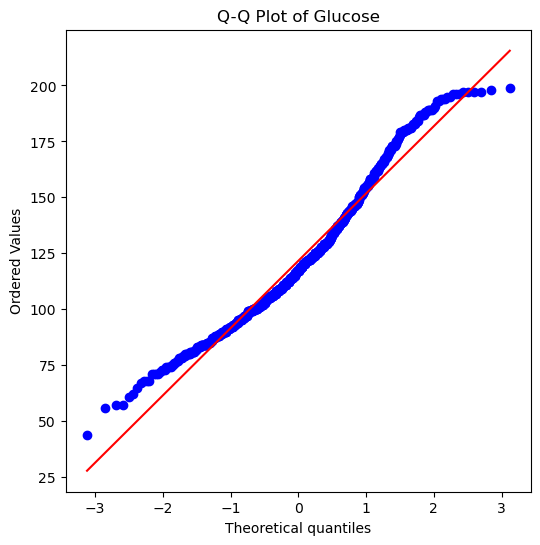

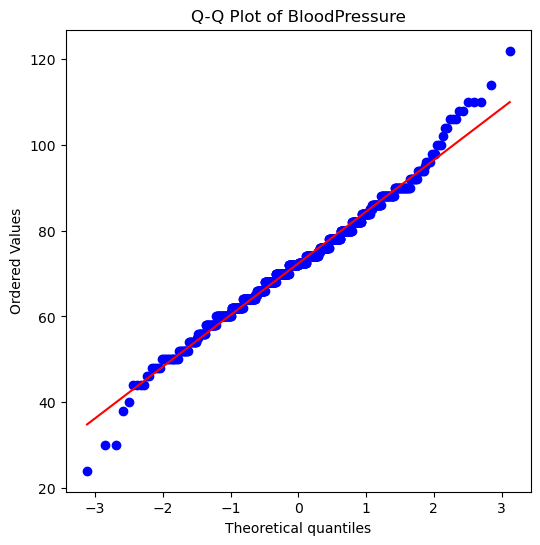

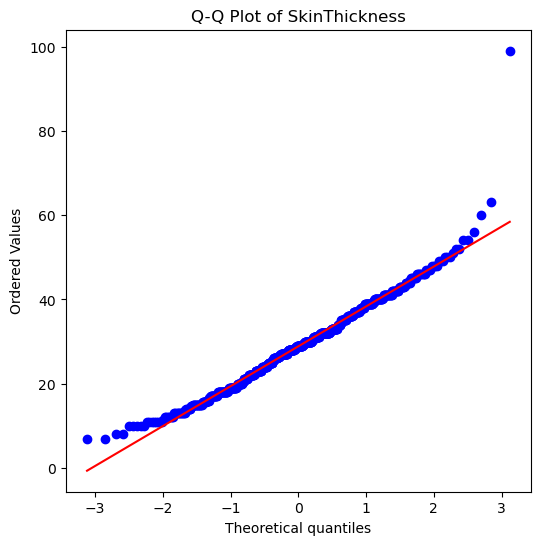

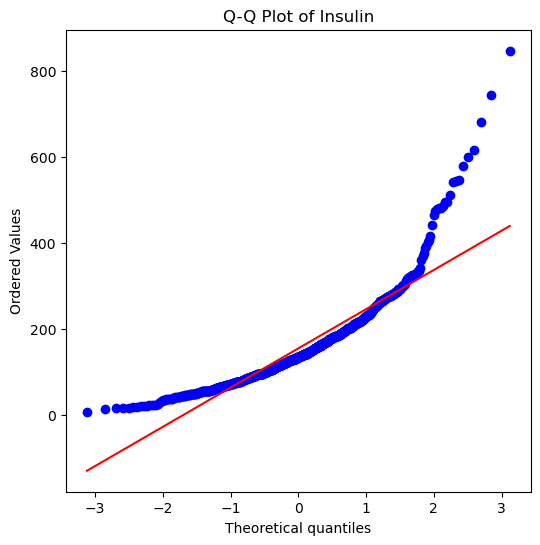

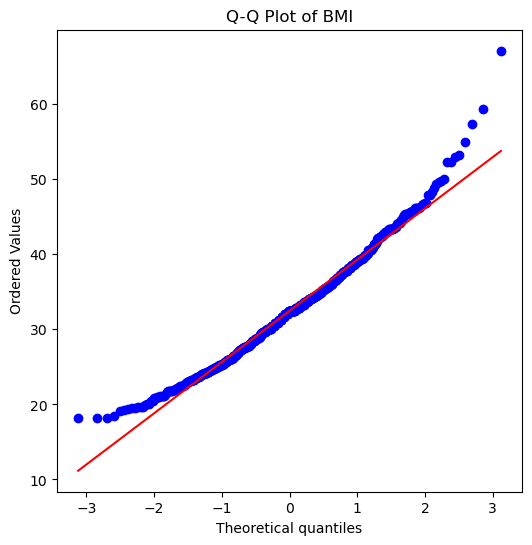

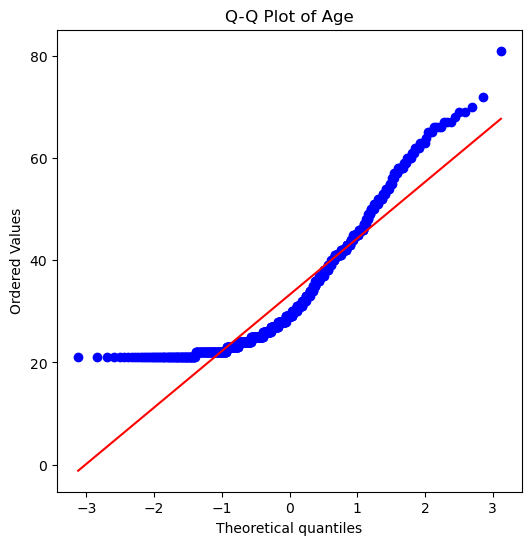

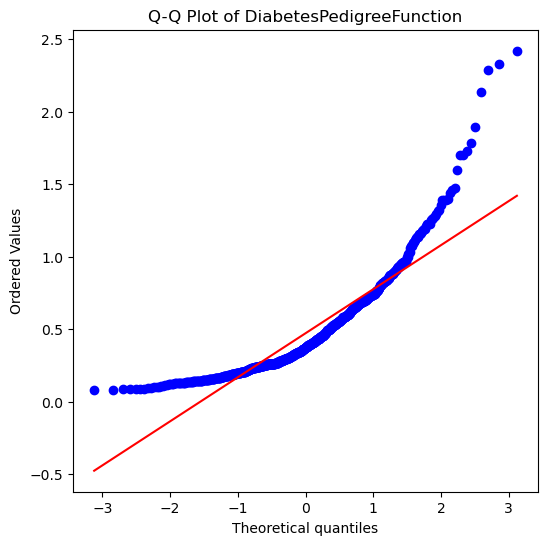

In [338]:
# Create Q-Q plots  ## Insulin (now better than before polynomial regression), Age, DiabetesPedigreeFunction is not normal
def qq_plot(data, feature):
    plt.figure(figsize=(6, 6))
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    plt.show()

# Plot Q-Q graphs for the features
for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age','DiabetesPedigreeFunction']:
    qq_plot(df, feature)
#df['Insulin_exp'] = df.Insulin**(1/1.2)
#qq_plot(df, 'Insulin')


## Check Feature importance

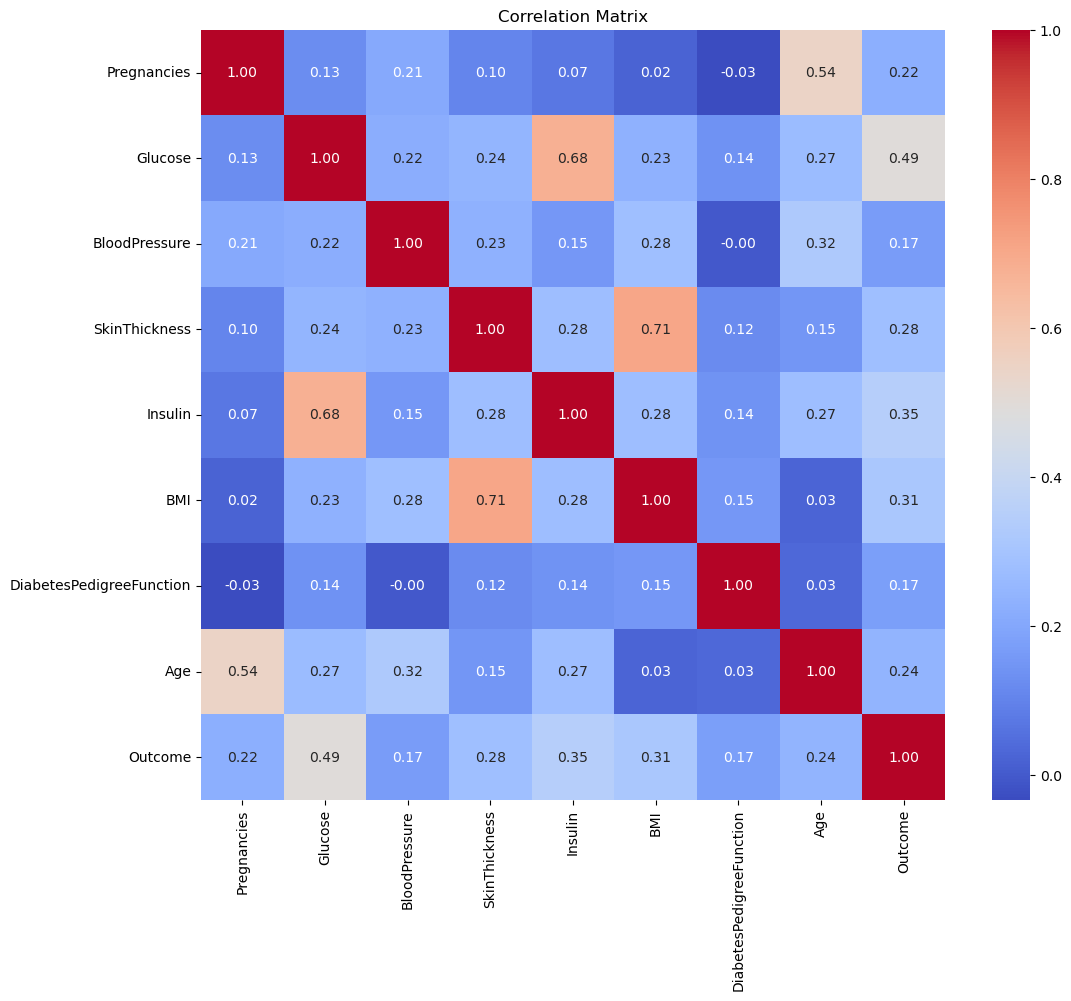

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


# Define Features && last column "Outcome" as Class

In [342]:
# Define Features && last column "Outcome" as Class
#X = df.iloc[:, :-1]  # Features = "Pregnancies" , "Glucose", "BloodPressure", "SkinThickness", "Inssulin", "BMI", "DiabetesPedigreeFunction", "Age"
#X = ['Glucose', 'Insulin', 'BMI','Age']
selected_features = ['Glucose', 'Insulin', 'BMI', 'Age']

X = df[selected_features]
y = df.iloc[:, -1]   # Class = "Outcome"


## Split data (80:20)

In [344]:
# Split data (80 Train: 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling (Standardization)

In [346]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
#numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Fit the scaler on the training data
#X_train_scaled = scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

# Transform the testing data
#X_test_scaled = scaler.transform(X_test)
X_test = scaler.transform(X_test)


# Check Feature importance

[0.12684753 0.12381117 0.06319184 0.07090007]


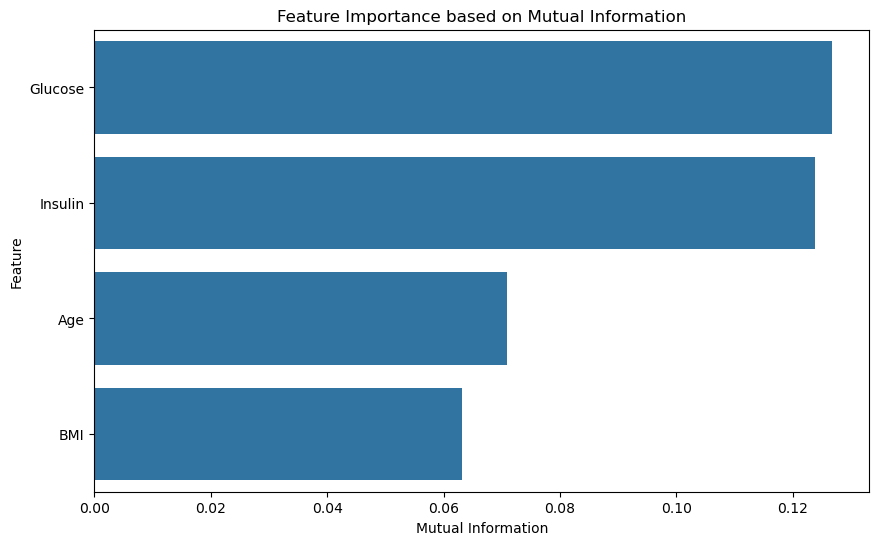

In [348]:
# Check Feature importance
# Calculate mutual information
#mi = mutual_info_classif(X_train, y_train)
mi = mutual_info_classif(X_train, y_train, random_state=42)
#mi = mutual_info_classif(X, y)
#mi = mutual_info_classif(X, y, random_state=42)
print(mi)

# Create a DataFrame for easier visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

# Sort by importance
mi_df = mi_df.sort_values('Mutual Information', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Feature Importance based on Mutual Information')
plt.show()


## Processing Imbalance data with SMOTE

In [350]:
# Processing Imbalance data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Check "Outcome" balanced or not

In [352]:
# Check "Outcome" balanced or not
y_train.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64